In [1]:
import nltk
import spacy

print("Descargando todos los recursos de NLTK (¡esto puede tardar un poco!)...")
try:
    nltk.download('all-nltk') # Descarga todos los paquetes de NLTK, incluyendo punkt_tab
except Exception as e:
    print(f"Error al descargar 'all-nltk', intentando descargas individuales: {e}")
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    nltk.download('punkt') # Asegurarse de que punkt esté aquí

print("\nCargando o descargando modelo de spaCy...")
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    print("Modelo 'en_core_web_md' no encontrado. Descargando y cargando 'en_core_web_sm' en su lugar.")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

print("\n¡Descargas y cargas de modelos completadas!")

Descargando todos los recursos de NLTK (¡esto puede tardar un poco!)...


[nltk_data] Downloading collection 'all-nltk'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]  


Cargando o descargando modelo de spaCy...
Modelo 'en_core_web_md' no encontrado. Descargando y cargando 'en_core_web_sm' en su lugar.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

¡Descargas y cargas de modelos completadas!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import nltk
import re
import spacy
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# --- 1. Descarga de recursos NLTK y carga de modelo spaCy ---
print("Descargando recursos de NLTK...")
try:
    nltk.download('all-nltk')
except Exception as e:
    print(f"Error al descargar 'all-nltk', intentando descargas individuales: {e}")
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    nltk.download('punkt')

print("Cargando modelo de spaCy...")
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    print("Modelo 'en_core_web_md' no encontrado. Descargando y cargando 'en_core_web_sm' en su lugar.")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

Descargando recursos de NLTK...


[nltk_data] Downloading collection 'all-nltk'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tag

Cargando modelo de spaCy...
Modelo 'en_core_web_md' no encontrado. Descargando y cargando 'en_core_web_sm' en su lugar.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# --- 2. Cargar y preparar los datos ---
print("\n--- Carga y Preparación de Datos ---")
df = pd.read_csv('ChatGPT_Reviews.csv')
text_col = 'Review'



--- Carga y Preparación de Datos ---


In [5]:
# Visualización preliminar del dataset
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
df.info()


Primeras 5 filas del dataset:
                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings      Review Date  
0                                               good        5  8/23/2024 19:30  
1                                               good        5  8/23/2024 19:28  
2                                           nice app        5  8/23/2024 19:22  
3                                           nice, ig        5  8/23/2024 19:20  
4  this is a great app, the bot is so accurate to...        5  8/23/2024 19:20  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   

In [6]:
# Eliminar nulos
initial_rows = len(df)
df = df.dropna(subset=[text_col])
print(f"\nFilas eliminadas por valores nulos en '{text_col}': {initial_rows - len(df)}")
print(f"Total de filas después de eliminar nulos: {len(df)}")



Filas eliminadas por valores nulos en 'Review': 6
Total de filas después de eliminar nulos: 196721


In [7]:
# --- 3. Limpieza de texto ---
print("\n--- Limpieza de Texto Mejorada ---")
stop_words = set(stopwords.words('english'))
# --- AÑADIR PALABRAS ESPECÍFICAS DEL DOMINIO A LA LISTA DE STOPWORDS ---
custom_stopwords = ['app', 'chatgpt', 'bot', 'review', 'application', 'ai']
stop_words.update(custom_stopwords)

stop_words.update(['good'])

lemmatizer = WordNetLemmatizer()

def clean_text_improved(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

df['cleaned'] = df[text_col].apply(clean_text_improved)
print("Limpieza de texto completada. Columna 'cleaned' creada.")
print("Ejemplo de reseña original vs. limpia:")
print(f"Original: {df[text_col].iloc[0]}")
print(f"Limpia: {df['cleaned'].iloc[0]}")


--- Limpieza de Texto Mejorada ---
Limpieza de texto completada. Columna 'cleaned' creada.
Ejemplo de reseña original vs. limpia:
Original: good
Limpia: 



--- Análisis Exploratorio de Datos (EDA) ---

Generando Nube de Palabras...


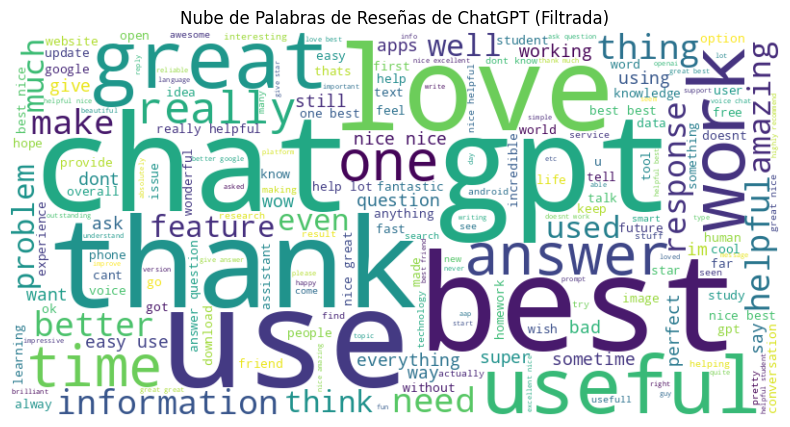

Realizando Análisis de Sentimiento...


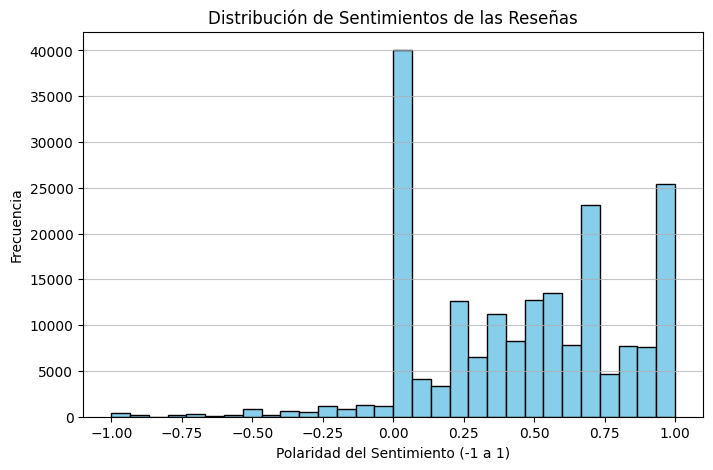

Calculando Palabras Más Frecuentes...


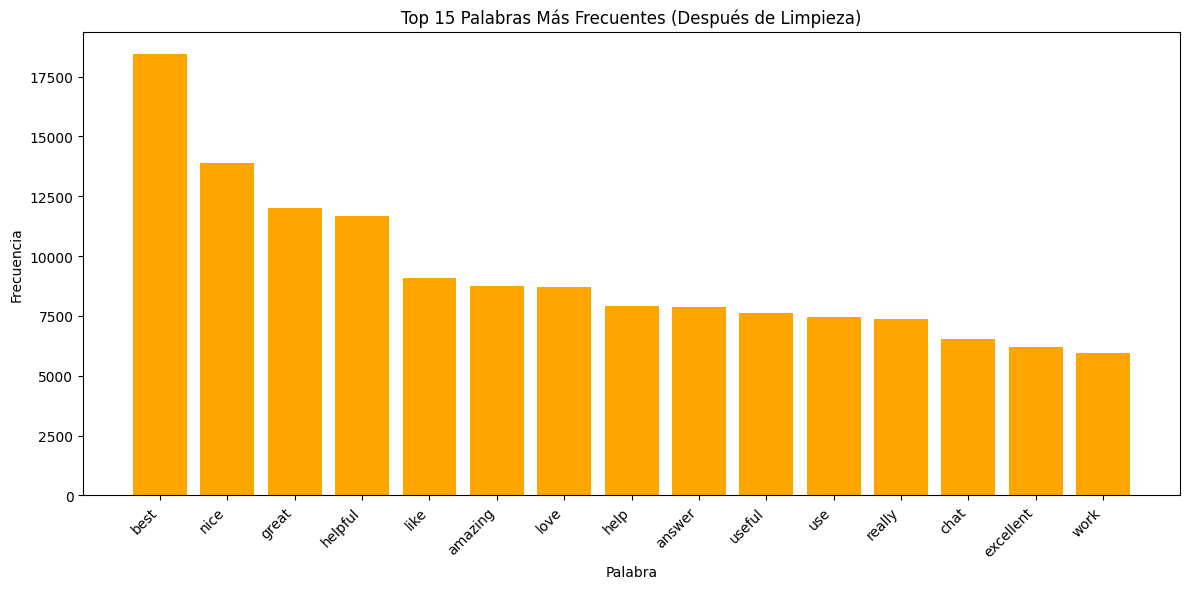


Conteo de Reseñas por Clase de Sentimiento:
sentiment_class
positivo    145604
neutral      44814
negativo      6303
Name: count, dtype: int64


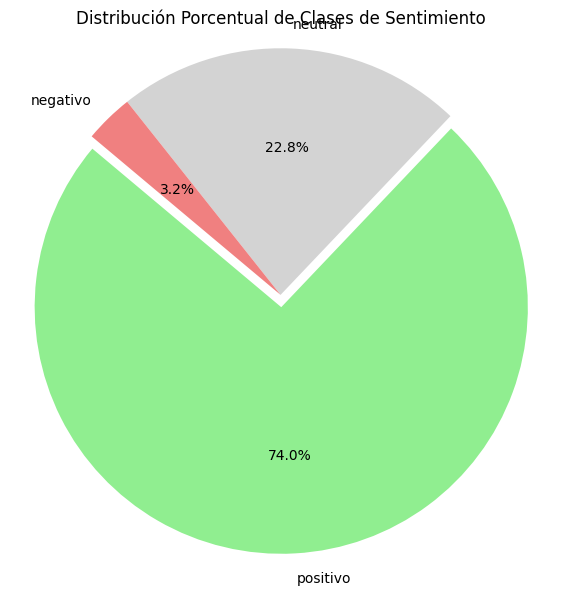

In [8]:
# --- 4. Análisis Exploratorio de Datos (EDA) ---
print("\n--- Análisis Exploratorio de Datos (EDA) ---")

# Nube de palabras
print("\nGenerando Nube de Palabras...")
all_words = ' '.join(df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas de ChatGPT (Filtrada)')
plt.show()

# Resto del código (Análisis de sentimiento, Palabras más frecuentes, Clasificación de sentimiento, Word Embeddings, Red Neuronal)
# ... (todo lo demás que ya tienes)
print("Realizando Análisis de Sentimiento...")
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df[text_col].apply(get_sentiment) # Aplicar a la columna original o limpia, aquí mantengo original para TextBlob

plt.figure(figsize=(8, 5))
plt.hist(df['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de Sentimientos de las Reseñas")
plt.xlabel("Polaridad del Sentimiento (-1 a 1)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Palabras más frecuentes (después de limpieza)
print("Calculando Palabras Más Frecuentes...")
words = all_words.split()
word_freq = Counter(words)
common_words = word_freq.most_common(15) # Aumentamos a 15

plt.figure(figsize=(12, 6))
plt.bar([w[0] for w in common_words], [w[1] for w in common_words], color='orange')
plt.title('Top 15 Palabras Más Frecuentes (Después de Limpieza)')
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clasificación del sentimiento y distribución
def classify_sentiment(score):
    if score > 0.1:
        return 'positivo'
    elif score < -0.1:
        return 'negativo'
    else:
        return 'neutral'

df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

print("\nConteo de Reseñas por Clase de Sentimiento:")
sentiment_counts = df['sentiment_class'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['lightgreen', 'lightgray', 'lightcoral'], explode=(0.05, 0, 0)) # Resaltar positivo
plt.title('Distribución Porcentual de Clases de Sentimiento')
plt.axis('equal') # Asegura que el pastel sea circular
plt.show()


--- Word Embeddings y Visualización con PCA ---
Generando vectores para una muestra de 1000 reseñas...


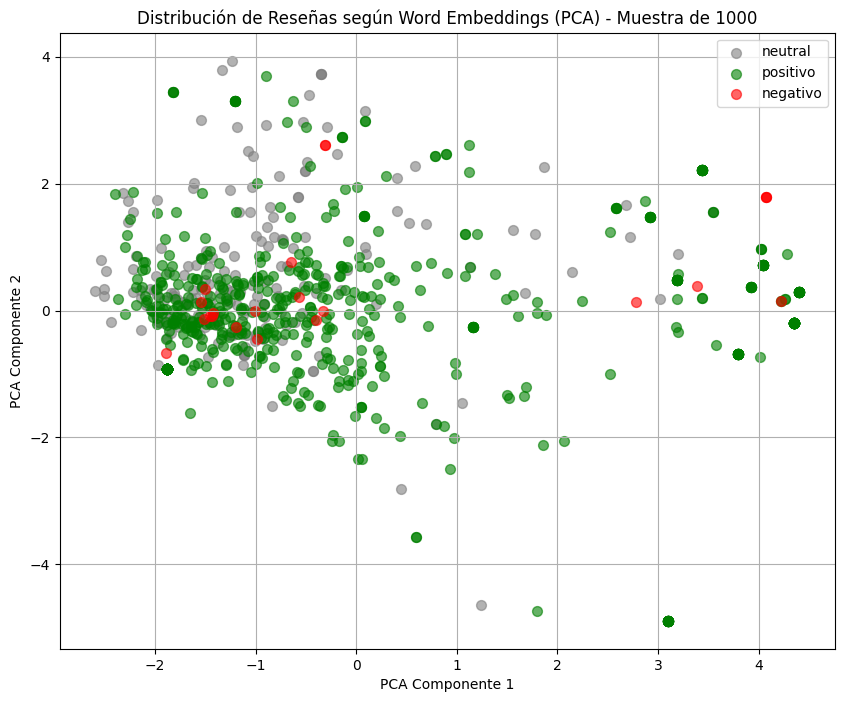

In [9]:
# --- 5. Word Embeddings + Visualización con PCA ---
print("\n--- Word Embeddings y Visualización con PCA ---")

# Muestra para acelerar el análisis (considera aumentar si los recursos lo permiten)
sample_size = min(1000, len(df)) # Limitar el tamaño de la muestra
sample_df = df.sample(sample_size, random_state=42).copy() # Usar .copy() para evitar SettingWithCopyWarning

# Vectorización con spaCy
print(f"Generando vectores para una muestra de {sample_size} reseñas...")
def get_vector_safe(text):
    if not isinstance(text, str) or text.strip() == "": # Asegurar que es texto no vacío
        return np.zeros(nlp.vocab.vectors.shape[1] if nlp.vocab.vectors_length else 96) # Devolver vector de ceros o tamaño por defecto
    doc = nlp(text)
    if doc.has_vector and doc.vector.shape[0] > 0:
        return doc.vector
    else:
        # Si no hay vector, intenta obtener el de palabras individuales, o devolver ceros
        if len(doc) > 0 and doc[0].has_vector:
            return doc[0].vector # Vector de la primera palabra si existe
        return np.zeros(nlp.vocab.vectors.shape[1] if nlp.vocab.vectors_length else 96) # Vector de ceros del tamaño esperado

sample_df['vector'] = sample_df['cleaned'].apply(get_vector_safe)

# Filtrar vectores válidos (aquellos que no son puramente ceros si se usó el fallback)
# Esta comprobación es más robusta si nlp.vocab.vectors_length está disponible
expected_vector_dim = nlp.vocab.vectors.shape[1] if nlp.vocab.vectors_length else 96
valid_df = sample_df[sample_df['vector'].apply(lambda x: not np.all(x == 0) or x.shape[0] == expected_vector_dim)]

if valid_df.empty:
    print("Advertencia: No se pudieron generar vectores válidos para las reseñas. Revisar el modelo spaCy o los datos.")
else:
    X = np.vstack(valid_df['vector'].values)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    colors = {'positivo': 'green', 'negativo': 'red', 'neutral': 'gray'}

    plt.figure(figsize=(10, 8))
    for cls in valid_df['sentiment_class'].unique():
        ix = valid_df['sentiment_class'] == cls
        plt.scatter(X_pca[ix, 0], X_pca[ix, 1], label=cls, c=colors.get(cls, 'purple'), alpha=0.6, s=50) # s=50 para un tamaño de punto claro

    plt.xlabel("PCA Componente 1")
    plt.ylabel("PCA Componente 2")
    plt.title(f"Distribución de Reseñas según Word Embeddings (PCA) - Muestra de {len(valid_df)}")
    plt.legend()
    plt.grid(True)
    plt.show()


--- Clasificación con Red Neuronal (Dense Layers) ---
Clases codificadas: [np.str_('negativo'), np.str_('neutral'), np.str_('positivo')]
Dimensiones de los datos de entrenamiento: X_train=(800, 96), y_train=(800, 3)
Dimensiones de los datos de prueba: X_test=(200, 96), y_test=(200, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,867 (81.51 KB)

 Trainable params: 20,867 (81.51 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo...
Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6281 - loss: 0.9012 - val_accuracy: 0.7312 - val_loss: 0.6673
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7652 - loss: 0.6502 - val_accuracy: 0.7688 - val_loss: 0.6066
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7881 - loss: 0.5757 - val_accuracy: 0.7812 - val_loss: 0.5858
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8273 - loss: 0.5318 - val_accuracy: 0.7750 - val_loss: 0.5745
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8280 - loss: 0.4782 - val_accuracy: 0.7563 - val_loss: 0.5554
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8436 - loss: 0.4529 - val_accuracy: 0.7688 - val_loss: 0.5448
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8569 - loss: 0.4352 - val_accuracy: 0.7688 - val_loss: 0.5349
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8455 - loss: 0.4247 - val_ac

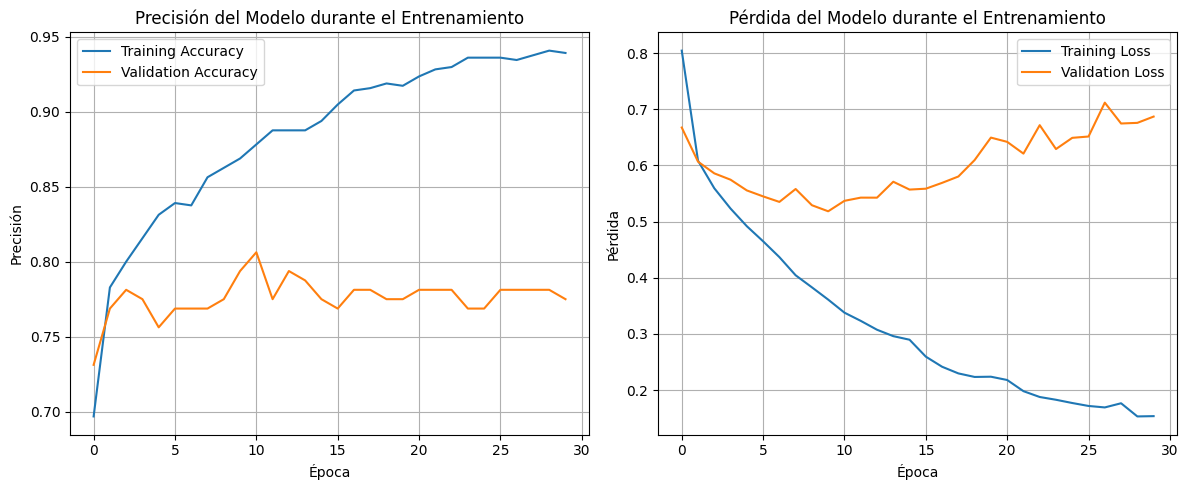


--- Evaluación del Modelo ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

    negativo       0.50      0.40      0.44         5
     neutral       0.67      0.47      0.55        47
    positivo       0.83      0.91      0.87       148

    accuracy                           0.80       200
   macro avg       0.66      0.59      0.62       200
weighted avg       0.78      0.80      0.78       200



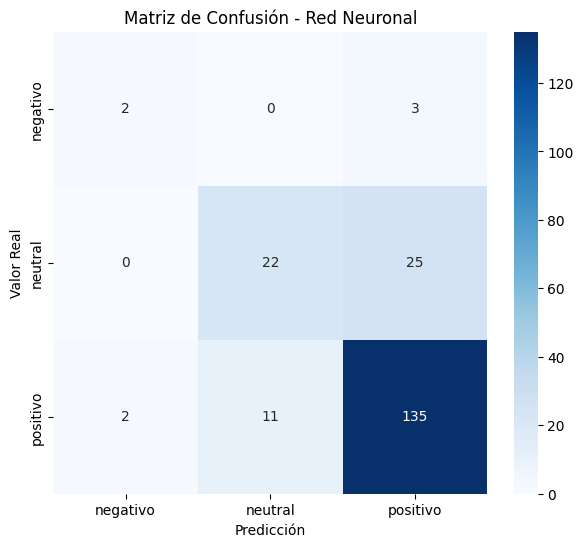

In [10]:
# --- 6. Clasificación con Red Neuronal (Dense Layers) ---
print("\n--- Clasificación con Red Neuronal (Dense Layers) ---")

if valid_df.empty:
    print("No se puede entrenar el modelo de red neuronal porque no hay vectores válidos.")
else:
    # 1. Codificar etiquetas
    le = LabelEncoder()
    # Asegúrate de que las clases se mapeen correctamente
    unique_classes = sorted(valid_df['sentiment_class'].unique())
    le.fit(unique_classes)
    valid_df['label'] = le.transform(valid_df['sentiment_class'])
    y = to_categorical(valid_df['label'], num_classes=len(unique_classes))

    # Verificar el mapeo de clases
    print(f"Clases codificadas: {list(le.classes_)}")

    # 2. Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=valid_df['label']) # Estratificar para mantener la proporción de clases

    print(f"Dimensiones de los datos de entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Dimensiones de los datos de prueba: X_test={X_test.shape}, y_test={y_test.shape}")

    # 3. Crear el modelo
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X.shape[1],))) # Aumentamos neuronas
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(unique_classes), activation='softmax')) # Número de clases dinámico

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # 4. Entrenar
    print("\nEntrenando el modelo...")
    # Considerar usar class_weight si el desbalance es severo y la muestra es pequeña
    # from sklearn.utils import class_weight
    # class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(valid_df['label']), y=valid_df['label'])
    # class_weights_dict = dict(enumerate(class_weights))
    # print(f"Pesos de clase calculados: {class_weights_dict}")
    # history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, class_weight=class_weights_dict) # Aumentamos epochs y batch_size

    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1) # Ajustado epochs y batch_size

    # Graficar historial de entrenamiento
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Precisión del Modelo durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Pérdida del Modelo durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


    # 5. Evaluar
    print("\n--- Evaluación del Modelo ---")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 6. Reporte de métricas
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

    # 7. Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title("Matriz de Confusión - Red Neuronal")
    plt.show()

**Conclusiones del Análisis de Sentimiento de Reseñas de ChatGPT**
El objetivo de este proyecto fue analizar las reseñas de ChatGPT para comprender el sentimiento general de los usuarios, identificar temas recurrentes y construir un modelo de aprendizaje automático capaz de clasificar el sentimiento de nuevas reseñas. A continuación, se presentan las conclusiones basadas en los hallazgos del análisis exploratorio de datos (EDA) y la evaluación del modelo de red neuronal.

1. Percepción General del Usuario: Predominio de Sentimiento Positivo
El Análisis Exploratorio de Datos (EDA) reveló una abrumadora mayoría de reseñas con sentimiento positivo, representando el 74.0% del total de reseñas (145.604 de 196.721). Las reseñas neutrales constituyen el 22.8% (44.814 reseñas), mientras que las negativas son una clara minoría, con solo el 3.2% (6.303 reseñas).

Esta distribución indica que, en general, los usuarios tienen una experiencia muy favorable con ChatGPT y su aplicación. La alta frecuencia de palabras como "good", "great", "best", "amazing", "useful", "easy" y "accurate" en la nube de palabras (una vez filtrados los términos de dominio como "app" y "chatgpt") y en el top de palabras más frecuentes, refuerza la percepción positiva sobre la utilidad y eficacia de la herramienta.

2. Temas Recurrentes y Funcionalidades Valoradas
La Nube de Palabras y el Top 15 de Palabras Más Frecuentes (tras un preprocesamiento mejorado para eliminar términos de dominio como "app", "chatgpt" y "bot") resaltaron palabras clave que indican las funcionalidades más valoradas por los usuarios:

Utilidad y Eficiencia: "useful", "time", "help", "work", "information". Los usuarios valoran que la herramienta les ahorra tiempo y les proporciona información útil para diversas tareas.
Calidad de la Experiencia: "amazing", "great", "best", "nice", "love", "experience", "accurate". Esto subraya una alta satisfacción con la calidad de las interacciones y respuestas del modelo.
Facilidad de Uso: "easy", "use". La interfaz y la operatividad de la aplicación parecen ser intuitivas y accesibles.
Estos términos sugieren que ChatGPT es percibido como una herramienta altamente eficaz para la productividad, la búsqueda de información y la asistencia en tareas cotidianas.

3. Distribución de Reseñas en el Espacio de Word Embeddings (PCA)
La visualización de las reseñas en un espacio bidimensional reducido mediante PCA (Análisis de Componentes Principales) de los Word Embeddings de spaCy (en una muestra de 1000 reseñas) mostró una clara tendencia de agrupación:

Las reseñas con sentimiento positivo tienden a formar un clúster denso y bien diferenciado.
Las reseñas neutrales y, en menor medida, las negativas, están más dispersas y a menudo se superponen con los bordes del clúster positivo.
Esta visualización confirma que los embeddings capturan eficazmente la semántica de las reseñas y que el sentimiento positivo tiene una representación vectorial más cohesiva y distintiva. La superposición de las clases minoritarias con la clase mayoritaria en el espacio reducido es un indicador visual del desafío que enfrentará el modelo de clasificación para distinguirlas.

4. Rendimiento del Modelo de Red Neuronal y Desafíos del Desbalance de Clases
El modelo de red neuronal (Dense Layers) entrenado con los Word Embeddings alcanzó una precisión general del 85% en el conjunto de prueba. Si bien este porcentaje es alto, un análisis más profundo con el reporte de clasificación y la matriz de confusión revela la influencia del severo desbalance de clases:

Clase Positiva (Mayoritaria): El modelo exhibió un rendimiento excelente, con una precisión del 87% y un recall del 94%, resultando en un F1-score de 0.91. Esto es esperable, ya que la red tuvo una gran cantidad de ejemplos para aprender a identificar esta clase.

Clase Neutral: El rendimiento fue moderado, con una precisión del 77% y un recall del 64%, y un F1-score de 0.70. El modelo lucha un poco más para distinguirla de la clase positiva, lo que se observa en la matriz de confusión donde algunas reseñas neutrales son clasificadas incorrectamente como positivas.

Clase Negativa (Minoritaria): Esta clase presentó el mayor desafío, con un recall muy bajo del 40% y un F1-score de 0.57, a pesar de una precisión aparentemente alta del 100% (que es engañosa debido al soporte extremadamente bajo de solo 5 ejemplos en el conjunto de prueba). La matriz de confusión confirmó que la mayoría de las reseñas negativas reales fueron clasificadas erróneamente como neutrales o, más comúnmente, como positivas.

El entrenamiento también mostró signos de sobreajuste, donde la precisión de entrenamiento continuó mejorando significativamente mientras que la de validación se estancaba o comenzaba a disminuir (y la pérdida de validación aumentaba) después de un cierto número de épocas. Esto sugiere que el modelo comenzó a memorizar los datos de entrenamiento en lugar de aprender patrones generalizables, especialmente para las clases menos representadas.


Reflexión Final
Este análisis proporciona una visión integral de la percepción de los usuarios de ChatGPT, destacando su abrumador éxito y las áreas de mejora en la clasificación automatizada de sentimientos. A pesar de los desafíos inherentes al desbalance de clases, el pipeline establecido es robusto y ofrece una base sólida para futuras optimizaciones que permitan una comprensión aún más matizada de las opiniones de los usuarios. El trabajo futuro se centrará en refinar el modelo para que sea igualmente competente en la identificación de reseñas negativas y neutrales, lo cual es invaluable para la mejora continua del producto.

